# Compare run of PE (4->1) with AdResS DD and normal DD

In [63]:
import os
from matplotlib import pyplot as plt
from pylab import rcParams
import matplotlib.gridspec as gridspec
import seaborn as sns
from collections import defaultdict
sns.set(style='ticks', palette='Set2')
dt = 0.001

def smooth(x,window_len=11,window='hanning'):
        if x.ndim != 1:
                raise ValueError, "smooth only accepts 1 dimension arrays."
        if x.size < window_len:
                raise ValueError, "Input vector needs to be bigger than window size."
        if window_len<3:
                return x
        if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
                raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"
        s=numpy.r_[2*x[0]-x[window_len-1::-1],x,2*x[-1]-x[-1:-window_len:-1]]
        if window == 'flat': #moving average
                w=numpy.ones(window_len,'d')
        else:  
                w=eval('numpy.'+window+'(window_len)')
        y=numpy.convolve(w/w.sum(),s,mode='same')
        return y[window_len:-window_len+1]

rcParams['figure.figsize'] = 17, 8
orig_values = {x: v for x, v in rcParams.iteritems() if 'size' in x}
rcParams.update({'font.size': 22, 
                 'legend.fontsize': 16, 
                 'axes.titlesize': 16,
                 'axes.labelsize': 16,
                 'xtick.labelsize': 16, 
                 'ytick.labelsize': 16,
                 })
res_cols = {'Ekin': 3,
 'T': 2,
 'angle_252': 12,
 'angle_252_cross': 11,
 'angle_253_cross': 10,
 'bond_124': 9,
 'bond_124_cross': 8,
 'bond_125_cross': 7,
 'dihedral_190': 14,
 'dihedral_190_cross': 13,
 'dihedral_191_cross': 15,
 'lj': 5,
 'lj-14_0': 17,
 'lj-14_1': 16,
 'lj-14_1_cross': 18,
 'lj-tab': 6,
 'res': 4,
 'step': 0,
 'time': 1,
 'Epot': (5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18),
 'bonds': (7, 8, 9),
 'angles': (10, 11, 12),
 'dihedrals': (13, 14, 15),
 'lj-14': (16, 17, 18)}

ref_cols = {
 'Ekin': 3,
 'P': 10,
 'T': 2,
 'angle_252': 6,
 'bond_124': 5,
 'dihedral_190': 7,
 'lj': 4,
 'lj-14_0': 8,
 'lj-14_1': 9,
 'step': 0,
 'time': 1,
 'Epot': (4, 5, 6, 7, 8, 9),
 'lj-14': (8, 9)
}

In [3]:
normal_data = np.loadtxt('normal_energy.csv', skiprows=1)
adress_dd = np.loadtxt('outenergy_0.0_12345.csv', skiprows=1)

In [7]:
header_normal = list(enumerate(open('normal_energy.csv').readline().split()))
header_adress = list(enumerate(open('outenergy_0.0_12345.csv').readline().split()))

In [6]:
print sorted(header_normal)

[(0, 'step'), (1, 'time'), (2, 'T'), (3, 'Ekin'), (4, 'lj'), (5, 'bond_124'), (6, 'angle_252'), (7, 'dihedral_190'), (8, 'lj-14_0'), (9, 'lj-14_1'), (10, 'P')]


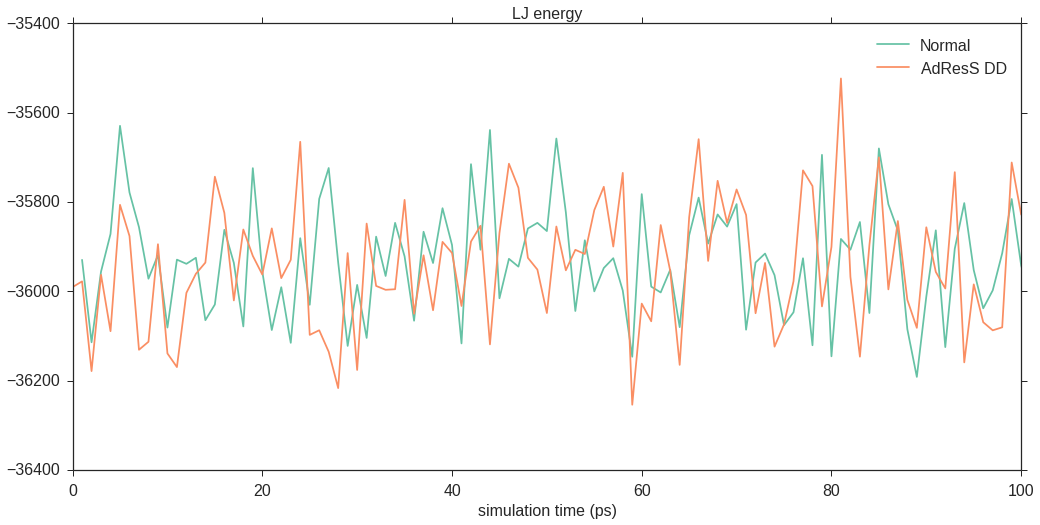

In [16]:
plt.plot(normal_data[:, 1], normal_data[:, 4], label='Normal')
plt.plot(adress_dd[:, 1], adress_dd[:, 5], label='AdResS DD')
plt.xlim(xmax=100)
plt.title('LJ energy')
plt.xlabel('simulation time (ps)')
plt.legend()

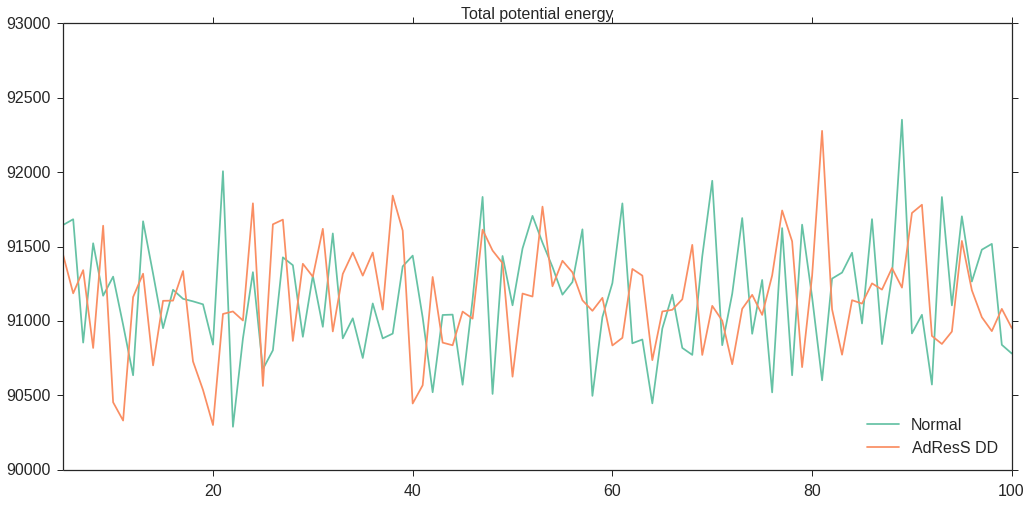

In [72]:
tot_normal = np.sum(normal_data[:, ref_cols['Epot']], axis=1)
tot_adress = np.sum(adress_dd[:, res_cols['Epot']], axis=1)
plt.plot(normal_data[:, 1], tot_normal, label='Normal')
plt.plot(adress_dd[:, 1], tot_adress, label='AdResS DD',)
plt.legend(loc=0)
plt.xlim(xmin=5, xmax=100)
plt.ylim(ymin=90000, ymax=93000)
plt.title('Total potential energy')

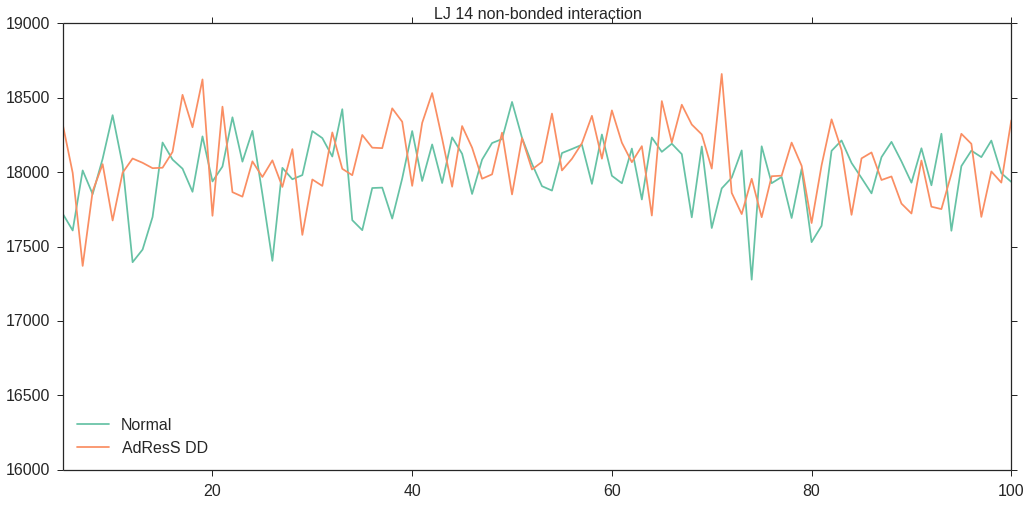

In [71]:
lj_14_normal = np.sum(normal_data[:, ref_cols['lj-14']], axis=1)
lj_14_adress = np.sum(adress_dd[:, res_cols['lj-14']], axis=1)
plt.plot(normal_data[:, 1], lj_14_normal, label='Normal')
plt.plot(adress_dd[:, 1], lj_14_adress, label='AdResS DD')
plt.xlim(xmin=5, xmax=100)
plt.ylim([16000, 19000])
plt.title('LJ 14 non-bonded interaction')
plt.legend(loc=0)

# Number of non-bonded pairs

In [73]:
normal_pairs = np.loadtxt('normal_pairs.dat')
adress_pairs = np.loadtxt('adress_pairs.dat')

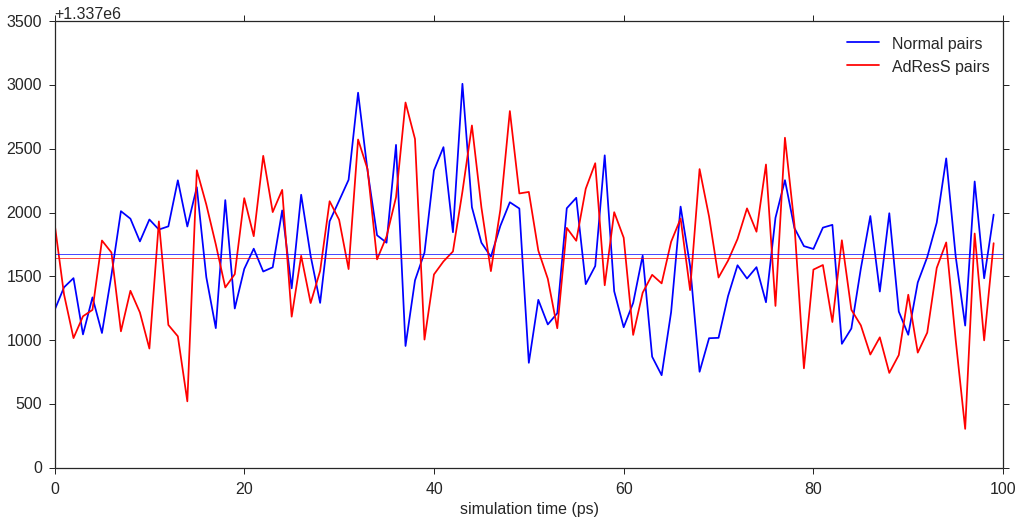

In [82]:
plt.plot(normal_pairs[:, 0], normal_pairs[:, 1], label='Normal pairs', color='b')
plt.plot(adress_pairs[:, 0], adress_pairs[:, 2], label='AdResS pairs', color='r')
plt.axhline(y=np.average(adress_pairs[:, 2]), color='r', linewidth=0.7)
plt.axhline(y=np.average(normal_pairs[:, 1]), color='b', linewidth=0.7)
plt.xlabel('simulation time (ps)')
plt.legend(loc=0)